<!-- Trabalho Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Lista 5 de Exercícios</font>

**ATENÇÃO**: Esta lista de exercícios pode requerer pesquisa complementar. A solução será apresentada no próximo capítulo.

In [1]:
# Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### Exercício 1: Análise de Distribuição de Receita Mensal

- Contexto: Uma loja online deseja entender a variabilidade das receitas mensais para ajustar seu fluxo de caixa.

- Tarefa: Carregue os dados simulados de receita mensal e apresente um relatório com média, mediana, desvio-padrão, assimetria e curtose. Visualize a distribuição e interprete se ela é simétrica, à direita ou à esquerda.

- Resultado esperado: Descreva a tendência central e a dispersão, comente se a média representa bem o conjunto.

In [2]:
# Seed
np.random.seed(10)

# Cria dados de receita
receita = np.random.normal(50000, 8000, 100)

# Cria o dataframe
df = pd.DataFrame({'Receita': receita})

# Visualiza os dados
df.head()

,Receita
0,60652.692033
1,55722.231795
2,37636.797663
3,49932.929201
4,54970.687791


===== RELATÓRIO DE DISTRIBUIÇÃO DE RECEITA =====
Média: R$ 50,635.33
Mediana: R$ 50,754.95
Desvio-padrão: R$ 7,775.29
Assimetria: 0.01
Curtose: 0.12


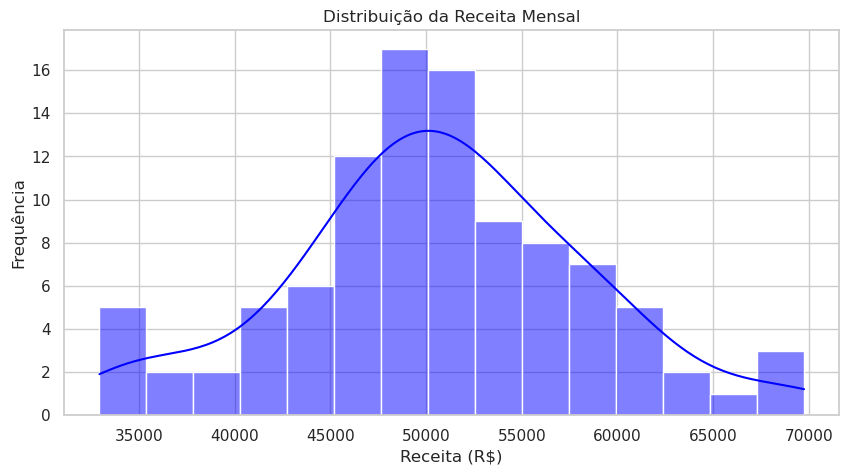


Interpretação: A distribuição é aproximadamente simétrica.
A média representa bem o conjunto de dados.


In [4]:
# Solução
from scipy.stats import skew, kurtosis

# Estatísticas descritivas
media = df['Receita'].mean()
mediana = df['Receita'].median()
desvio = df['Receita'].std()
assimetria = skew(df['Receita'])
curtose_ = kurtosis(df['Receita'])

# Relatório
print("===== RELATÓRIO DE DISTRIBUIÇÃO DE RECEITA =====")
print(f"Média: R$ {media:,.2f}")
print(f"Mediana: R$ {mediana:,.2f}")
print(f"Desvio-padrão: R$ {desvio:,.2f}")
print(f"Assimetria: {assimetria:.2f}")
print(f"Curtose: {curtose_:.2f}")

# Visualização da distribuição
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Receita', kde=True, color='blue', bins=15)
plt.title('Distribuição da Receita Mensal')
plt.xlabel('Receita (R$)')
plt.ylabel('Frequência')
plt.show()

# Interpretação
if abs(assimetria) < 0.3:
    tipo = "aproximadamente simétrica"
elif assimetria > 0.3:
    tipo = "assimétrica à direita (cauda longa para valores altos)"
else:
    tipo = "assimétrica à esquerda (cauda longa para valores baixos)"

print(f"\nInterpretação: A distribuição é {tipo}.")
if abs(media - mediana) / mediana < 0.1:
    print("A média representa bem o conjunto de dados.")
else:
    print("A média pode não representar bem o conjunto devido à assimetria.")


#### Exercício 2: Desempenho por Segmento de Cliente

- Contexto: Uma empresa quer comparar o valor médio gasto por clientes novos e antigos.

- Tarefa: Para os dois grupos (clientes novos e antigos), calcule média, mediana e desvio-padrão, e compare visualmente com boxplot. Discuta se há sobreposição entre os grupos e qual apresenta maior variabilidade.

- Resultado esperado: Indique diferenças de média e dispersão, e o que isso sugere sobre o perfil de gasto.

In [5]:
# Seed
np.random.seed(5)

# Dataframe
clientes = pd.DataFrame({
    'Grupo': ['Novo']*80 + ['Antigo']*80,
    'Gasto': np.concatenate([np.random.normal(180, 40, 80),
                             np.random.normal(230, 35, 80)])
})

# Visualiza os dados
clientes.sample(10)

,Grupo,Gasto
122,Antigo,216.853270
119,Antigo,229.406914
143,Antigo,207.787163
40,Novo,167.765879
4,Novo,184.384394
27,Novo,165.467565
150,Antigo,279.075832
106,Antigo,200.373598
82,Antigo,256.100443
50,Novo,236.535921


===== ESTATÍSTICAS DESCRITIVAS POR GRUPO =====
         Média  Mediana  Desvio_Padrão
Grupo                                 
Antigo  232.92   231.44          38.39
Novo    182.69   177.48          38.65


/tmp/ipykernel_4131/4284424445.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo', y='Gasto', data=clientes, palette='Set2')


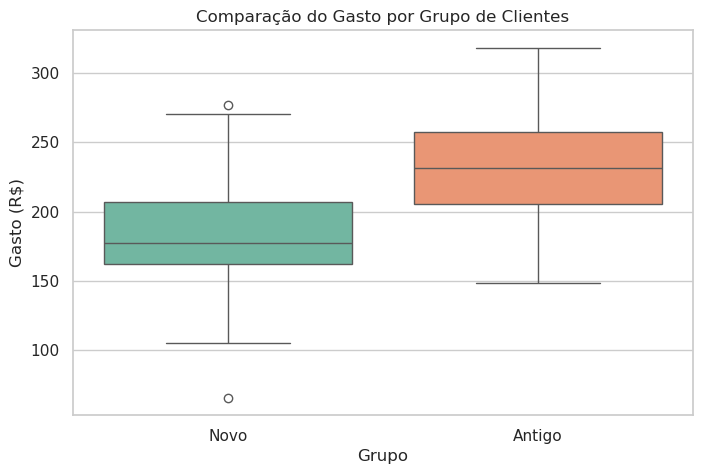


===== INTERPRETAÇÃO =====
Clientes antigos gastam mais (média R$ 232.92) que novos (média R$ 182.69).
A variabilidade é maior entre os clientes novos (DP = 38.65), sugerindo diferenças de gasto maiores entre eles.
O boxplot permite verificar se há sobreposição entre os intervalos interquartis (caixas).
Menor sobreposição → diferenças mais marcantes entre os grupos.


In [6]:
# Solução
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas por grupo
estatisticas = clientes.groupby('Grupo')['Gasto'].agg(
    Média='mean',
    Mediana='median',
    Desvio_Padrão='std'
).round(2)

print("===== ESTATÍSTICAS DESCRITIVAS POR GRUPO =====")
print(estatisticas)

# Boxplot comparando os grupos
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.boxplot(x='Grupo', y='Gasto', data=clientes, palette='Set2')
plt.title('Comparação do Gasto por Grupo de Clientes')
plt.ylabel('Gasto (R$)')
plt.show()

# Interpretação automática
media_novo = estatisticas.loc['Novo', 'Média']
media_antigo = estatisticas.loc['Antigo', 'Média']
dp_novo = estatisticas.loc['Novo', 'Desvio_Padrão']
dp_antigo = estatisticas.loc['Antigo', 'Desvio_Padrão']

print("\n===== INTERPRETAÇÃO =====")
if media_antigo > media_novo:
    print(f"Clientes antigos gastam mais (média R$ {media_antigo:.2f}) que novos (média R$ {media_novo:.2f}).")
else:
    print(f"Clientes novos gastam mais (média R$ {media_novo:.2f}) que antigos (média R$ {media_antigo:.2f}).")

if dp_antigo > dp_novo:
    print(f"A variabilidade é maior entre os clientes antigos (DP = {dp_antigo:.2f}), sugerindo comportamentos de gasto mais heterogêneos.")
elif dp_antigo < dp_novo:
    print(f"A variabilidade é maior entre os clientes novos (DP = {dp_novo:.2f}), sugerindo diferenças de gasto maiores entre eles.")
else:
    print("A variabilidade é semelhante entre os grupos.")

print("O boxplot permite verificar se há sobreposição entre os intervalos interquartis (caixas).")
print("Menor sobreposição → diferenças mais marcantes entre os grupos.")


#### Exercício 3: Correlação Entre Horas de Estudo e Nota

- Contexto: Um professor quer saber se o tempo de estudo está associado ao desempenho dos alunos.

- Tarefa: Calcule a correlação de Pearson e gere o gráfico de dispersão com linha de regressão. Interprete o grau e a direção da relação.

- Resultado esperado: Descreva se há correlação positiva, negativa ou nula e o que isso significa em termos práticos.

In [7]:
# Seed
np.random.seed(2)

# Dados
horas = np.random.uniform(1, 10, 50)
notas = 5*horas + np.random.normal(0, 5, 50)

# Dataframe
df = pd.DataFrame({'Horas': horas, 'Nota': notas})

# Visualiza os dados
df.head()

,Horas,Nota
0,4.923954,20.474094
1,1.233336,6.605232
2,5.946962,34.736641
3,4.917902,22.684045
4,4.783310,22.038204


===== CORRELAÇÃO ENTRE HORAS DE ESTUDO E NOTA =====
Coeficiente de correlação de Pearson: 0.915
P-valor: 0.0000


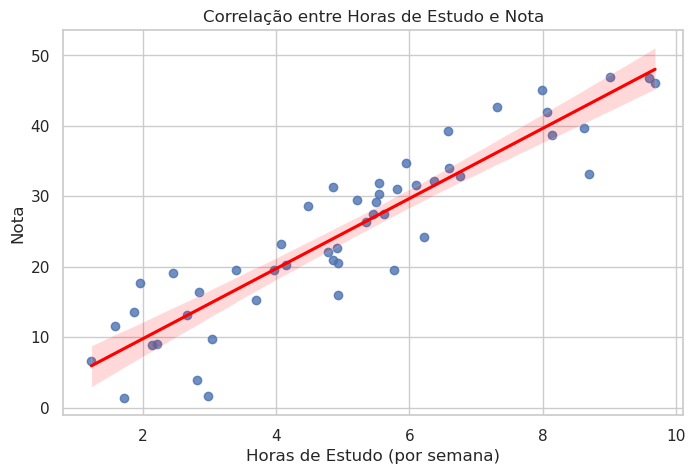


===== INTERPRETAÇÃO =====
A correlação é forte e positiva (r = 0.91).
A relação é estatisticamente significativa (p < 0.05).


In [8]:
# Solução
from scipy.stats import pearsonr

# Correlação de Pearson
corr, p_valor = pearsonr(df['Horas'], df['Nota'])

print("===== CORRELAÇÃO ENTRE HORAS DE ESTUDO E NOTA =====")
print(f"Coeficiente de correlação de Pearson: {corr:.3f}")
print(f"P-valor: {p_valor:.4f}")

# Gráfico de dispersão com linha de regressão
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.regplot(x='Horas', y='Nota', data=df, line_kws={"color": "red"})
plt.title('Correlação entre Horas de Estudo e Nota')
plt.xlabel('Horas de Estudo (por semana)')
plt.ylabel('Nota')
plt.show()

# Interpretação automática
print("\n===== INTERPRETAÇÃO =====")

if abs(corr) > 0.7:
    if corr > 0:
        relacao = "forte e positiva"
    else:
        relacao = "forte e negativa"
elif abs(corr) > 0.3:
    if corr > 0:
        relacao = "moderada e positiva"
    else:
        relacao = "moderada e negativa"
elif abs(corr) > 0.1:
    if corr > 0:
        relacao = "fraca e positiva"
    else:
        relacao = "fraca e negativa"
else:
    relacao = "nula"

print(f"A correlação é {relacao} (r = {corr:.2f}).")

if p_valor < 0.05:
    print("A relação é estatisticamente significativa (p < 0.05).")
else:
    print("A relação não é estatisticamente significativa (p ≥ 0.05).")

#### Exercício 4: Variação Semanal de Vendas

- Contexto: O gestor deseja entender como as vendas variam ao longo da semana.

- Tarefa: Simule dados de vendas diárias, calcule média e desvio por dia da semana e gere um gráfico de barras. Interprete os dias de maior e menor performance.

- Resultado esperado: Identifique os dias mais fortes e mais fracos, e comente sobre a estabilidade semanal das vendas.

In [10]:
# Seed
np.random.seed(3)

# Dados
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
vendas = pd.DataFrame({
    'Dia': np.random.choice(dias, 200),
    'Vendas': np.random.normal(1000, 150, 200)
})

# Visualiza os dados
vendas.head()

,Dia,Vendas
0,Qua,911.338189
1,Seg,922.537395
2,Ter,856.000573
3,Qui,1056.594285
4,Seg,913.793737


===== ESTATÍSTICAS DE VENDAS POR DIA DA SEMANA =====
       Média  Desvio_Padrão  Contagem
Dia                                  
Seg  1008.34         121.90        41
Ter   990.27         142.26        28
Qua  1009.72         134.50        28
Qui  1027.47         196.07        23
Sex  1049.79         152.09        39
Sab  1021.63         133.61        24
Dom  1034.72         161.90        17


/tmp/ipykernel_4131/675639.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Dia', y='Vendas', data=vendas, estimator='mean', ci='sd', palette='coolwarm')
/tmp/ipykernel_4131/675639.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia', y='Vendas', data=vendas, estimator='mean', ci='sd', palette='coolwarm')


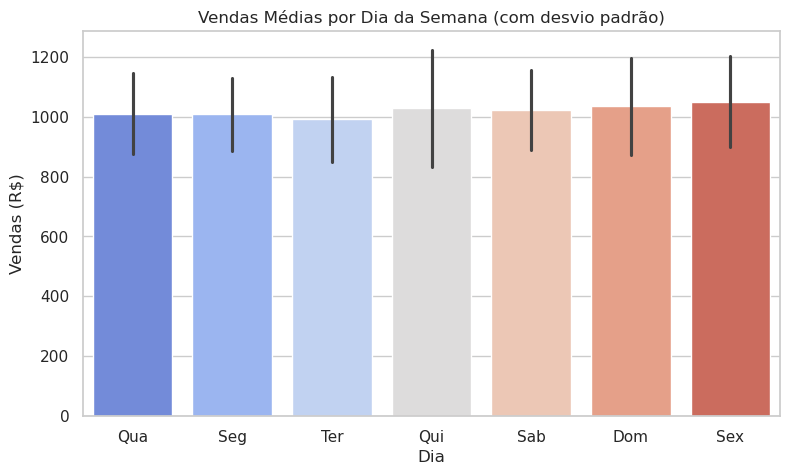


===== INTERPRETAÇÃO =====
Dia mais forte: Sex (média ≈ R$ 1049.79)
Dia mais fraco: Ter (média ≈ R$ 990.27)
Coeficiente de variação semanal: 14.34%
As vendas apresentam variação moderada entre os dias.


In [11]:
# Solução
# Agrupa as vendas médias e o desvio-padrão por dia
estatisticas = vendas.groupby('Dia')['Vendas'].agg(
    Média='mean',
    Desvio_Padrão='std',
    Contagem='count'
).reindex(['Seg','Ter','Qua','Qui','Sex','Sab','Dom'])  # mantém a ordem dos dias

print("===== ESTATÍSTICAS DE VENDAS POR DIA DA SEMANA =====")
print(estatisticas.round(2))

# Gráfico de barras com intervalo de variação
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.barplot(x='Dia', y='Vendas', data=vendas, estimator='mean', ci='sd', palette='coolwarm')
plt.title('Vendas Médias por Dia da Semana (com desvio padrão)')
plt.ylabel('Vendas (R$)')
plt.show()

# Identifica dias mais fortes e fracos
dia_forte = estatisticas['Média'].idxmax()
dia_fraco = estatisticas['Média'].idxmin()

media_geral = vendas['Vendas'].mean()
desvio_geral = vendas['Vendas'].std()
coef_var = (desvio_geral / media_geral) * 100  # Coeficiente de variação (%)

print("\n===== INTERPRETAÇÃO =====")
print(f"Dia mais forte: {dia_forte} (média ≈ R$ {estatisticas.loc[dia_forte,'Média']:.2f})")
print(f"Dia mais fraco: {dia_fraco} (média ≈ R$ {estatisticas.loc[dia_fraco,'Média']:.2f})")
print(f"Coeficiente de variação semanal: {coef_var:.2f}%")

# Interpretação da estabilidade
if coef_var < 10:
    print("As vendas são muito estáveis ao longo da semana.")
elif coef_var < 20:
    print("As vendas apresentam variação moderada entre os dias.")
else:
    print("As vendas são instáveis, com grandes diferenças entre os dias.")

#### Exercício 5: Estimativa da Média com Intervalo de Confiança (Statsmodels)

- Contexto: Um analista de RH quer estimar a altura média dos colaboradores com 95% de confiança.

- Tarefa: Calcule a média e o intervalo de confiança usando o DescrStatsW do Statsmodels. Interprete o resultado como se fosse parte de um relatório técnico.

- Resultado esperado: Apresente a altura média estimada e explique o significado do intervalo de confiança no contexto da amostra.

In [16]:
from statsmodels.stats.weightstats import DescrStatsW

# Seed
np.random.seed(7)

# Conjunto de dados
alturas = np.random.normal(1.75, 0.08, 40)

# Visualiza os dados
alturas

array([1.88524206, 1.71272501, 1.75262561, 1.7826013 , 1.68688616,
       1.75016525, 1.74992877, 1.60962206, 1.83141264, 1.79803988,
       1.69996568, 1.73627614, 1.79042395, 1.72909149, 1.73058007,
       1.63374069, 1.79436642, 1.75991047, 1.77195679, 1.62787804,
       1.88205598, 1.76234684, 1.7190288 , 1.91232578, 1.74636912,
       1.6339457 , 1.71758177, 1.56693479, 1.83395172, 1.71668205,
       1.69059572, 1.83579761, 1.61791395, 1.79283435, 1.58484682,
       1.69702725, 1.65366241, 1.86695805, 1.89129287, 1.7236469 ])

In [17]:
# Estatísticas descritivas e intervalo de confiança
dados = DescrStatsW(alturas)
media = dados.mean
ic_inferior, ic_superior = dados.tconfint_mean(alpha=0.05)  # 95% de confiança

print("===== ESTIMATIVA DA ALTURA MÉDIA =====")
print(f"Média amostral: {media:.3f} m")
print(f"Intervalo de confiança (95%): [{ic_inferior:.3f} m, {ic_superior:.3f} m]")

# Interpretação técnica
print("\n===== INTERPRETAÇÃO =====")
print(f"A altura média estimada dos colaboradores é de aproximadamente {media:.2f} metros.")
print(f"Com 95% de confiança, a média populacional verdadeira encontra-se entre {ic_inferior:.2f} m e {ic_superior:.2f} m.")
print("Isso significa que, se novas amostras semelhantes fossem coletadas várias vezes, cerca de 95% dos intervalos calculados conteriam a verdadeira média populacional.")

===== ESTIMATIVA DA ALTURA MÉDIA =====
Média amostral: 1.742 m
Intervalo de confiança (95%): [1.714 m, 1.770 m]

===== INTERPRETAÇÃO =====
A altura média estimada dos colaboradores é de aproximadamente 1.74 metros.
Com 95% de confiança, a média populacional verdadeira encontra-se entre 1.71 m e 1.77 m.
Isso significa que, se novas amostras semelhantes fossem coletadas várias vezes, cerca de 95% dos intervalos calculados conteriam a verdadeira média populacional.


# Fim